# Проект: разработка решения для HR-аналитики компании «Работа с заботой» по вопросам удовлетворенности сотрудника и возможностью его увольнения

HR-аналитики компании «Работа с заботой» помогают бизнесу оптимизировать управление персоналом: бизнес предоставляет данные, а аналитики предлагают, как избежать финансовых потерь и оттока сотрудников. В этом HR-аналитикам пригодится машинное обучение, с помощью которого получится быстрее и точнее отвечать на вопросы бизнеса.

У нас будет несколько задач. 

Первая — построить модель, которая сможет предсказать уровень удовлетворённости сотрудника на основе данных заказчика. 

Вторая задача — построить модель, которая сможет на основе данных заказчика предсказать то, что сотрудник уволится из компании.

# Задача 1: предсказание уровня удовлетворённости сотрудника
Для этой задачи заказчик предоставил данные с признаками:
- id — уникальный идентификатор сотрудника;
- dept — отдел, в котором работает сотрудник;
- level — уровень занимаемой должности;
- workload — уровень загруженности сотрудника;
- employment_years — длительность работы в компании (в годах);
- last_year_promo — показывает, было ли повышение за последний год;
- last_year_violations — показывает, нарушал ли сотрудник трудовой договор за последний год;
- supervisor_evaluation — оценка качества работы сотрудника, которую дал руководитель;
- salary — ежемесячная зарплата сотрудника;
- job_satisfaction_rate — уровень удовлетворённости сотрудника работой в компании, целевой признак.

# План работы
Шаг 1 Загрузка данных

Шаг 2 Предобработка данных

Шаг 3 Исследовательский анализ данных

Шаг 4 Подготовка данных

Шаг 5 Обучение моделей

Шаг 6 Оформление выводов

# Задача 2: предсказание увольнения сотрудника из компании

Предоставленные данные:

- train_quit.csv (Тренировочная выборка)

- test_features.csv (Входные признаки тестовой выборки те же, что и в прошлой задаче)

- test_target_quit.csv (Целевой признак тестовой выборки)

# План работы
Шаг 1 Загрузка данных

Шаг 2 Предобработка данных

Шаг 3 Исследовательский анализ данных

Шаг 4 Добавление нового входного признака 

Шаг 5 Подготовка данных

Шаг 6 Обучение моделей

Шаг 7 Оформление выводов

# Импорты и константы

In [1]:
!pip install phik -q

In [2]:
!pip install scikit-learn -U -q

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import phik
import math
from phik.report import plot_correlation_matrix

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV,GridSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import make_scorer
from sklearn.metrics import roc_auc_score

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

from sklearn.feature_selection import SelectKBest, f_classif
RANDOM_STATE=42

# Задача 1

## Загрузка данных

In [4]:
train_job_satisfaction_rate = pd.read_csv('/datasets/train_job_satisfaction_rate.csv')
test_features = pd.read_csv('/datasets/test_features.csv')
test_target_job_satisfaction_rate = pd.read_csv('/datasets/test_target_job_satisfaction_rate.csv')

In [5]:
display(train_job_satisfaction_rate.head())
display(test_features.head())
test_target_job_satisfaction_rate.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
0,155278,sales,junior,medium,2,no,no,1,24000,0.58
1,653870,hr,junior,high,2,no,no,5,38400,0.76
2,184592,sales,junior,low,1,no,no,2,12000,0.11
3,171431,technology,junior,low,4,no,no,2,18000,0.37
4,693419,hr,junior,medium,1,no,no,3,22800,0.20


,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
0,485046,marketing,junior,medium,2,no,no,5,28800
1,686555,hr,junior,medium,1,no,no,4,30000
2,467458,sales,middle,low,5,no,no,4,19200
3,418655,sales,middle,low,6,no,no,4,19200
4,789145,hr,middle,medium,5,no,no,5,40800


,id,job_satisfaction_rate
0,130604,0.74
1,825977,0.75
2,418490,0.60
3,555320,0.72
4,826430,0.08


In [6]:
display(train_job_satisfaction_rate.describe())
display(test_features.describe())
test_target_job_satisfaction_rate.describe()

,id,employment_years,supervisor_evaluation,salary,job_satisfaction_rate
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,544957.621000,3.718500,3.476500,33926.700000,0.533995
std,257883.104622,2.542513,1.008812,14900.703838,0.225327
min,100954.000000,1.000000,1.000000,12000.000000,0.030000
25%,322836.750000,2.000000,3.000000,22800.000000,0.360000
50%,534082.500000,3.000000,4.000000,30000.000000,0.560000
75%,771446.000000,6.000000,4.000000,43200.000000,0.710000
max,999521.000000,10.000000,5.000000,98400.000000,1.000000


,id,employment_years,supervisor_evaluation,salary
count,2000.000000,2000.000000,2000.000000,2000.000000
mean,552765.213500,3.666500,3.526500,34066.800000
std,253851.326129,2.537222,0.996892,15398.436729
min,100298.000000,1.000000,1.000000,12000.000000
25%,339052.000000,1.000000,3.000000,22800.000000
50%,550793.000000,3.000000,4.000000,30000.000000
75%,765763.750000,6.000000,4.000000,43200.000000
max,999029.000000,10.000000,5.000000,96000.000000


,id,job_satisfaction_rate
count,2000.000000,2000.00000
mean,552765.213500,0.54878
std,253851.326129,0.22011
min,100298.000000,0.03000
25%,339052.000000,0.38000
50%,550793.000000,0.58000
75%,765763.750000,0.72000
max,999029.000000,1.00000


In [7]:
display(train_job_satisfaction_rate.info())
display(test_features.info())
test_target_job_satisfaction_rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     4000 non-null   int64  
 1   dept                   3994 non-null   object 
 2   level                  3996 non-null   object 
 3   workload               4000 non-null   object 
 4   employment_years       4000 non-null   int64  
 5   last_year_promo        4000 non-null   object 
 6   last_year_violations   4000 non-null   object 
 7   supervisor_evaluation  4000 non-null   int64  
 8   salary                 4000 non-null   int64  
 9   job_satisfaction_rate  4000 non-null   float64
dtypes: float64(1), int64(4), object(5)
memory usage: 312.6+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     2000 non-null   int64 
 1   dept                   1998 non-null   object
 2   level                  1999 non-null   object
 3   workload               2000 non-null   object
 4   employment_years       2000 non-null   int64 
 5   last_year_promo        2000 non-null   object
 6   last_year_violations   2000 non-null   object
 7   supervisor_evaluation  2000 non-null   int64 
 8   salary                 2000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 140.8+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     2000 non-null   int64  
 1   job_satisfaction_rate  2000 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 31.4 KB


# Вывод по описательной статистике:
Данные загружены, в предоставленных таблицах аномальных либо нулевых значений не обнаружено, видим пропуски в таблице train_job_satisfaction_rate и test_features, исправим их на этапе предобработки

## Предобработка данных

In [8]:
#Для начала ищем неявные дубликаты в данных
for c in train_job_satisfaction_rate.iloc[:,1:8]:
    print(f'уникальные значения в столбце {c} {train_job_satisfaction_rate[c].unique()}')
    

уникальные значения в столбце dept ['sales' 'hr' 'technology' 'purchasing' 'marketing' nan]
уникальные значения в столбце level ['junior' 'middle' 'sinior' nan]
уникальные значения в столбце workload ['medium' 'high' 'low']
уникальные значения в столбце employment_years [ 2  1  4  7  9  6  3 10  8  5]
уникальные значения в столбце last_year_promo ['no' 'yes']
уникальные значения в столбце last_year_violations ['no' 'yes']
уникальные значения в столбце supervisor_evaluation [1 5 2 3 4]


In [9]:
for c in test_features.iloc[:,1:8]:
    print(f'уникальные значения в столбце {c} {test_features[c].unique()}')

уникальные значения в столбце dept ['marketing' 'hr' 'sales' 'purchasing' 'technology' nan ' ']
уникальные значения в столбце level ['junior' 'middle' 'sinior' nan]
уникальные значения в столбце workload ['medium' 'low' 'high' ' ']
уникальные значения в столбце employment_years [ 2  1  5  6  3  9  7  4  8 10]
уникальные значения в столбце last_year_promo ['no' 'yes']
уникальные значения в столбце last_year_violations ['no' 'yes']
уникальные значения в столбце supervisor_evaluation [5 4 3 1 2]


In [10]:
#ищем янвые дубликаты
print(train_job_satisfaction_rate.duplicated().sum())
print(test_features.duplicated().sum())
print(test_target_job_satisfaction_rate.duplicated().sum())

0
0
0


In [11]:
print(train_job_satisfaction_rate.isna().sum())
print()
print(test_features.isna().sum())
print()
print(test_target_job_satisfaction_rate.isna().sum()) #ищем пропуски

id                       0
dept                     6
level                    4
workload                 0
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
job_satisfaction_rate    0
dtype: int64

id                       0
dept                     2
level                    1
workload                 0
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
dtype: int64

id                       0
job_satisfaction_rate    0
dtype: int64


Видим пропущенные значения в столбцах dept и level в таблицах с признаками. Также, на этапе поиска неявных дубликатов можно было заметить значения " "(т.е. пропуск) в столбце workload, заменим их на nan

# Вывод
Проверли предобработку, заменили пропуски на nan, дубликатов в данных не обнаружено, аномальные значения также отсутсвуют

## Исселдовательский анализ

In [12]:
def cat_plots(df,about): #функция для построения графиков по категориальным признакам, с аргументами:
    #df - табл с данными, about - название графика 
    df.value_counts().plot(  
        kind = 'barh', 
        color = 'crimson')
    plt.xlabel('Частота'),
    plt.ylabel("Значения"),
    plt.title('Распределение значений по признаку {0}'.format(about));
    plt.show()

In [13]:
def num_plots(df,about):#функция для построения графиков по количественным признакам 
    fig,axes = plt.subplots(1, 2,figsize = (15,5))
    plt.subplot(1,2,1)
    a = df.count()
    b = round(1 + 3.322*math.log(a)) #для определения оптимального количества интервалов используется правило Стёрджеса
    plt.hist(df,bins = b,ec='black')
    plt.xlabel('Значения')
    plt.ylabel("Частота")
    plt.title('Распределение значений по признаку {0}'.format(about)),
    plt.subplot(1,2,2)
    plt.boxplot(df, vert=False)
    plt.title('Ящик с усами для признака {0}'.format(about))
    plt.show();

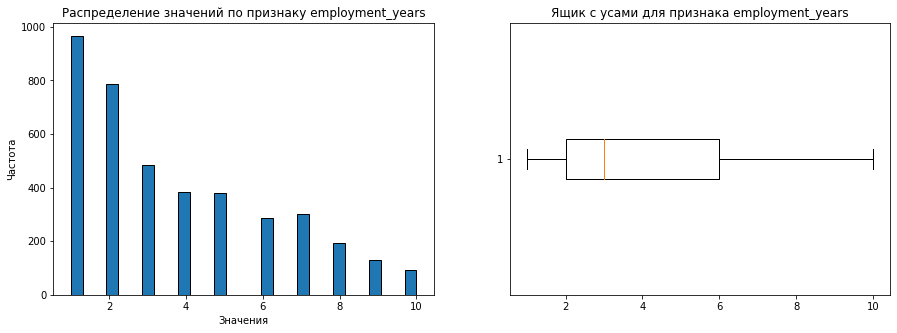

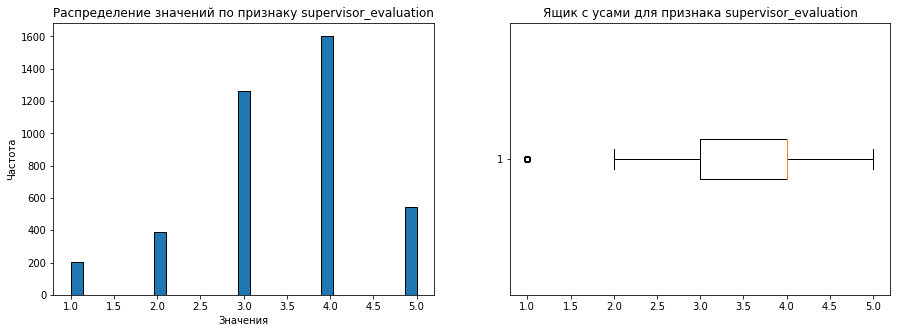

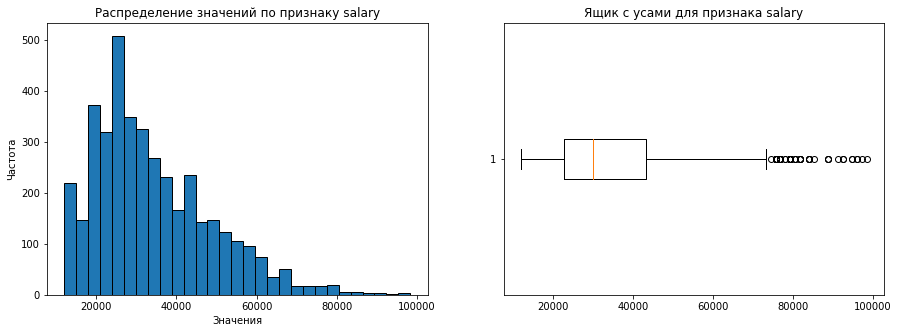

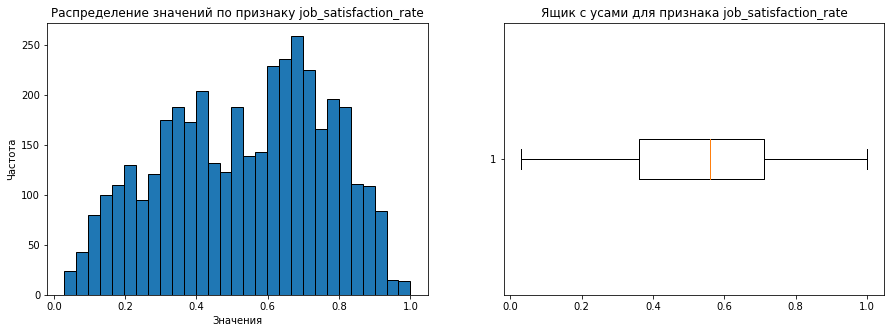

In [14]:
for_num = train_job_satisfaction_rate[train_job_satisfaction_rate.select_dtypes(include='number').columns].drop(['id'], axis=1)
for x in for_num:
    num_plots(train_job_satisfaction_rate[x],x)
    plt.show()

In [15]:
train_job_satisfaction_rate[train_job_satisfaction_rate.select_dtypes(exclude='number').columns]

,dept,level,workload,last_year_promo,last_year_violations
0,sales,junior,medium,no,no
1,hr,junior,high,no,no
2,sales,junior,low,no,no
3,technology,junior,low,no,no
4,hr,junior,medium,no,no
...,...,...,...,...,...
3995,technology,junior,high,no,no
3996,sales,junior,medium,no,no
3997,sales,middle,low,no,no
3998,sales,junior,medium,no,no


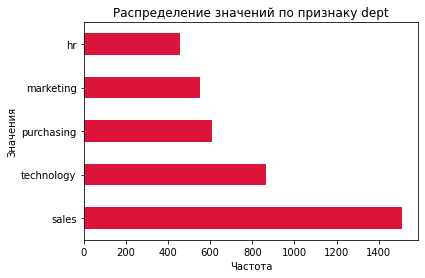

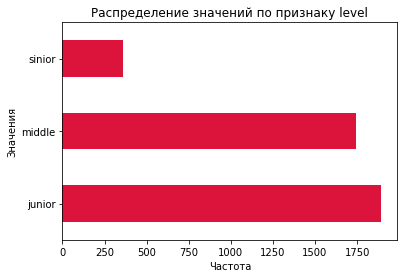

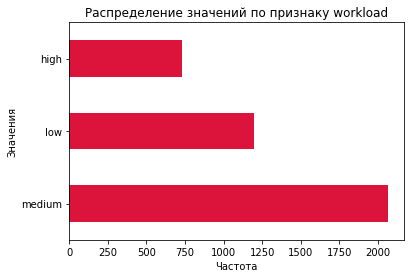

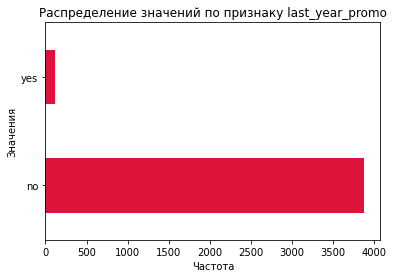

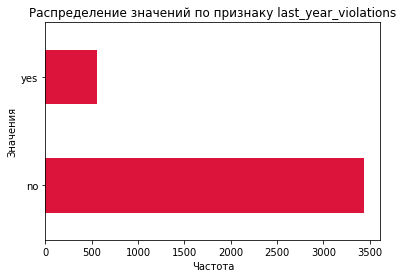

In [16]:
cat_train = train_job_satisfaction_rate[train_job_satisfaction_rate.select_dtypes(exclude='number').columns]
for x in cat_train:
    cat_plots(train_job_satisfaction_rate[x],x)

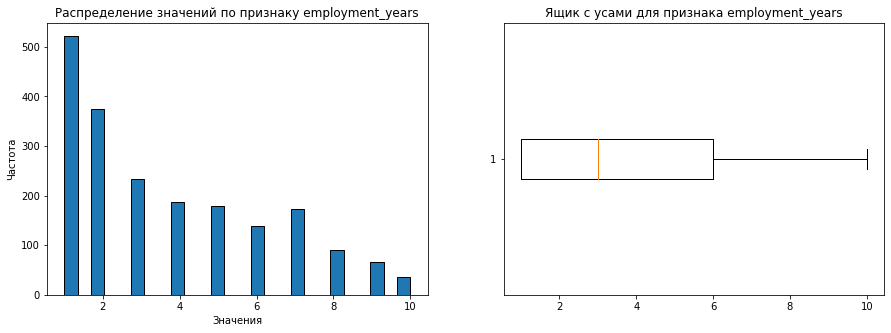

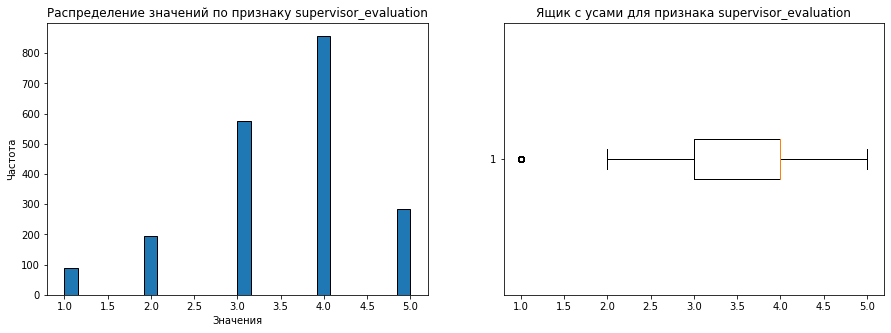

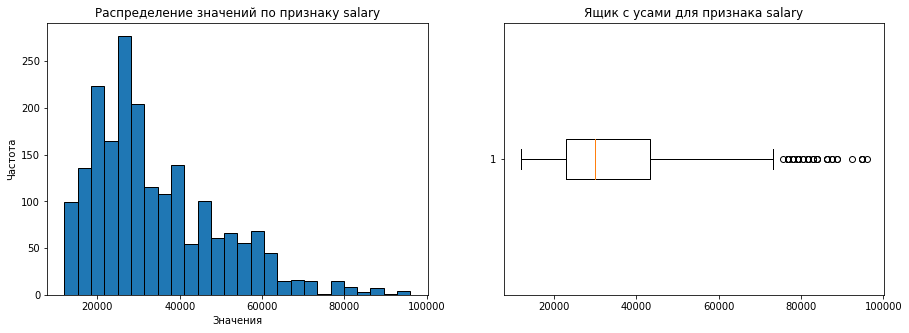

In [17]:
for_num_test = test_features[test_features.select_dtypes(include='number').columns].drop(['id'], axis=1)
for x in for_num_test:
    num_plots(test_features[x],x)
    plt.show()

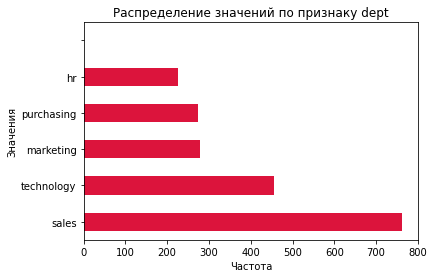

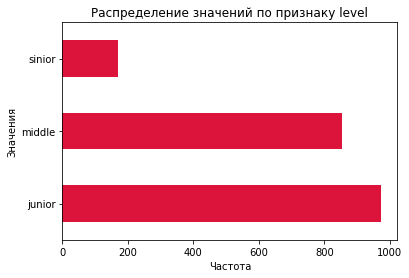

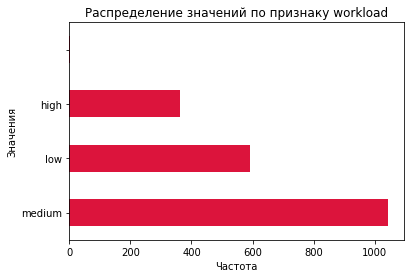

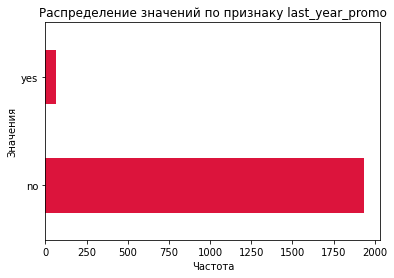

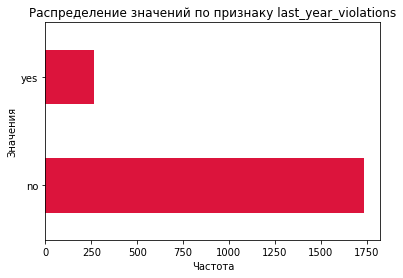

In [18]:
cat_test = test_features[test_features.select_dtypes(exclude='number').columns]
for x in cat_test:
    cat_plots(test_features[x],x)

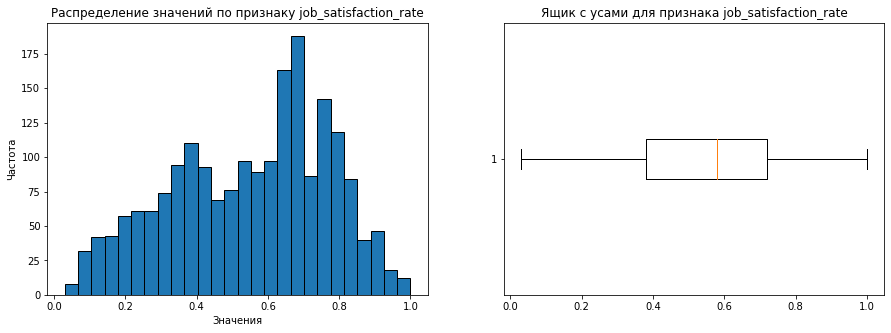

In [19]:
num_plots(test_target_job_satisfaction_rate.drop('id',axis=1),'job_satisfaction_rate')

# Вывод
По результатам исследовательского анализа можно сказать,что:

- dept: большинство работников находится в отделе продаж, меньше всего в отделе HR
- level: меньше всего в компании работает сеньеров, примерно поровну работников ранга джун и мидл
- workload: достаточно мало работников имеют сильную загруженность, большинство сотрудников загружены средне
- last_year_promo: за последний год практически не было повышений
- last_year_violations: порядка 12% сотрудников нарушали условие трудового договора, остальные сотрудники не нарушали
- employment_years: Мультимодальное распределение, большинство работников устроились в компанию недавно, чем больше опыт работы в компании, тем меньше таких работников(с большим опытом)
- supervisor_evaluation: Мультимодальное распределение, почти все работники получили оценку 4 на втором месте по популярности оценка 3, самая редкая оценка - 1
- salary: Нормальное распределение со смещением влево, в основном работники получают от 20 до 30 тысяч, также в данных есть достаточно большие значения, но я бы не сказал, что эти данные могут навредить модели, а также не думаю, что их стоит удалять, тк сеньеры получают высокие зп и наличие в данных таких значений, поможет правильно классифицировать удовлетвроенность работника уровня сеньер
- целевой признак job_satisfaction_rate:Нормальное распределение со смещением вправо, в среднем работники удовлетворены на 70%, также большое количество работников удовлетворены на 80%

Все признаки изучили, по поводу выбросов описано в пункте salary, исправлять данные не нужно

## Подготовка данных

Признаки level и workload выстраиваются по рангу, поэтому кодируем их OrdinalEncoder

Остальные категориальные признаки кодируем OHE

Количественные признаки масштабируем

In [20]:
df = test_features.merge(test_target_job_satisfaction_rate, on='id', how='left') #объеденим оба теста в 1 таблицу

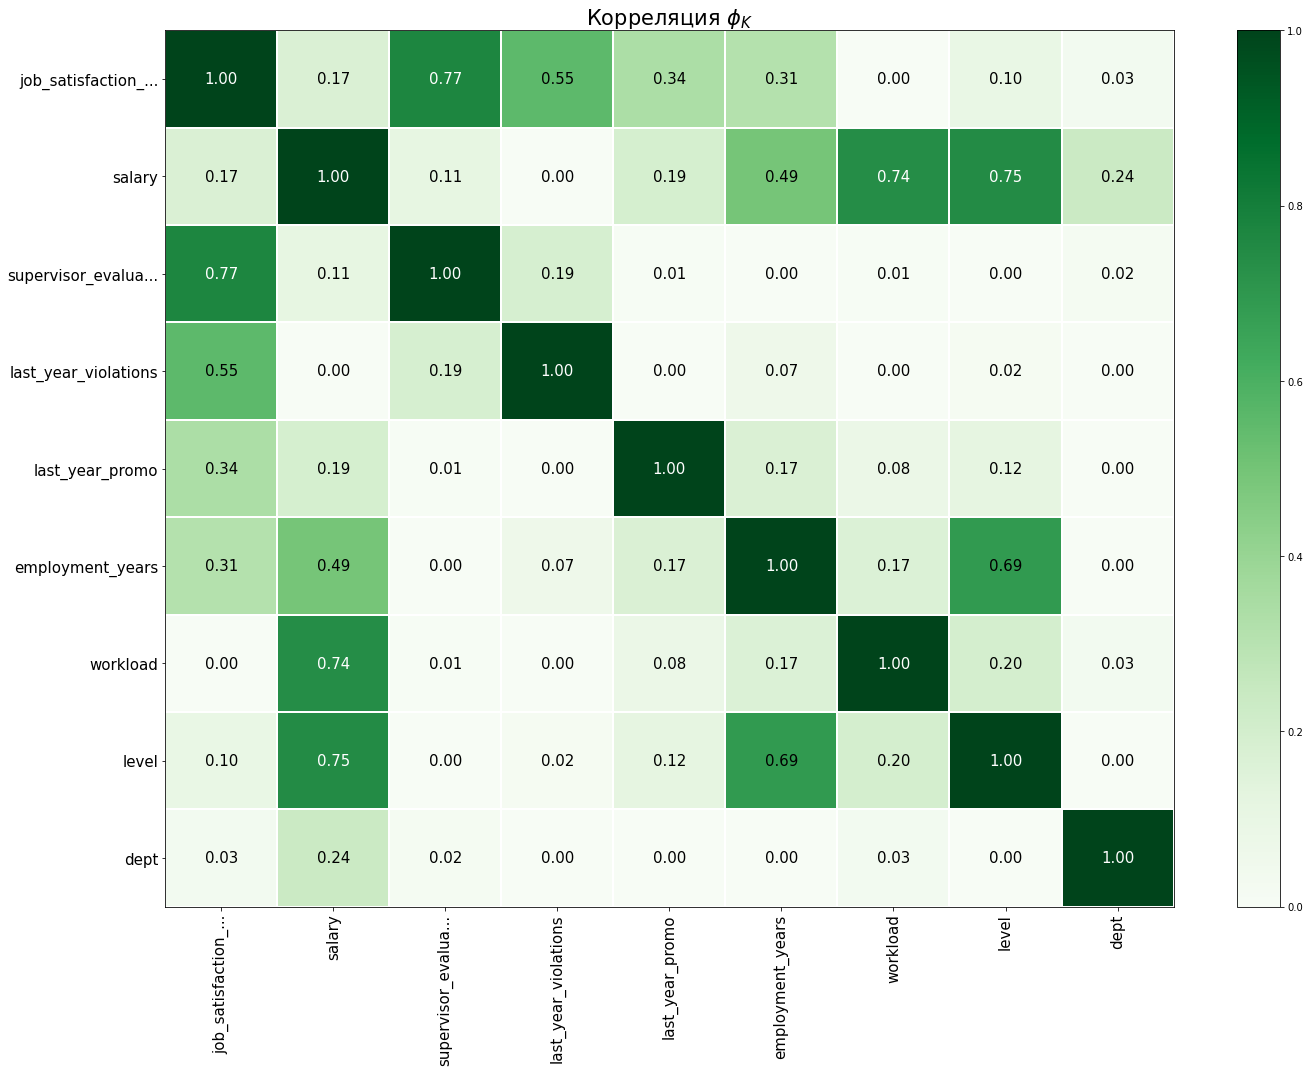

In [21]:
phik_overview=df.drop('id', axis=1).phik_matrix(verbose=False)

plot_correlation_matrix(
    phik_overview.values,
    x_labels=phik_overview.columns,
    y_labels=phik_overview.index,
    vmin=0, vmax=1, color_map='Greens',
    title=r'Корреляция $\phi_K$',
    fontsize_factor=1.5,
    figsize=(20, 15)
)

In [22]:
X0_train = train_job_satisfaction_rate.drop(['id'], axis=1) #переменная в которой хранится трейн выборка с целевым
print(X0_train.duplicated().sum())
X0_train.drop_duplicates(inplace=True)#после удаления id появляются дубликаты

245


In [23]:
X_train = X0_train.drop('job_satisfaction_rate', axis=1) #трейн выборка
y_train = X0_train['job_satisfaction_rate'] #целевой
X_test = df.drop(['job_satisfaction_rate','id'], axis=1) #тест выборка
y_test = df['job_satisfaction_rate'] #целевой

## Обучение моделей

In [24]:
ohe_columns = ['dept', 'last_year_promo', 'last_year_violations'] 
ord_columns = ['level', 'workload']
num_columns = ['employment_years', 'supervisor_evaluation', 'salary']


ohe_pipe = Pipeline(
    [('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False))
    ]
)

ord_pipe = Pipeline(
    [('simpleImputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ord',  OrdinalEncoder(
                categories=[
                    ['junior', 'middle', 'sinior'], 
                    ['low', 'medium', 'high']
                ], 
                handle_unknown='use_encoded_value', unknown_value=np.nan
            )
        ),
     ('simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),

    ]
)

data_preprocessor = ColumnTransformer(
    [('ohe', ohe_pipe, ohe_columns),
     ('ord', ord_pipe, ord_columns),
     ('num', StandardScaler(), num_columns)
    ], 
    remainder='passthrough'
)

pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', LinearRegression())
])
 
param_grid = [

    {
        'models': [LinearRegression()],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']   
    },

    {
        'models': [DecisionTreeRegressor(random_state=RANDOM_STATE)],
        'models__max_depth': range(2, 20),
        'models__max_features': range(2, 20),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    }
]
def smape(y_true, y_pred):
    return 100/len(y_true) * sum(2 * abs(y_pred - y_true) / (abs(y_true) + abs(y_pred)))
   
smape_scorer = make_scorer(score_func=smape, greater_is_better=False)
 
randomized_search = RandomizedSearchCV(
    pipe_final,
    param_grid,
    n_jobs=-1,
    cv=10,
    random_state=RANDOM_STATE,
    n_iter=10,
    scoring=smape_scorer
)
randomized_search.fit(X_train, y_train)

RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('ohe',
                                                                               Pipeline(steps=[('simpleImputer_ohe',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('ohe',
                                                                                                OneHotEncoder(drop='first',
                                                                                                              handle_unknown='ignore',
                                                                                                              sparse_output=False))]),
                                                                               ['dept',
                                                                                'last_year_promo',
                                                                                'last_year_violations']),
                                                                              ('ord',
                                                                               Pi...
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               'passthrough']},
                                        {'models': [DecisionTreeRegressor(random_state=42)],
                                         'models__max_depth': range(2, 20),
                                         'models__max_features': range(2, 20),
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               'passthrough']}],
                   random_state=42,
                   scoring=make_scorer(smape, greater_is_better=False, response_method='predict'))

In [25]:
print('Лучшая модель и её параметры:\n\n', randomized_search.best_estimator_)
print(f'Параметры лучшей модели:\n{randomized_search.best_params_}')
print ('Метрика лучшей модели', -randomized_search.best_score_)

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['dept', 'last_year_promo',
                                                   'last_year_violations']),
                                                 ('ord',
                            

In [26]:
result = pd.DataFrame(randomized_search.cv_results_)
display(result[
    ['rank_test_score', 'param_models', 'mean_test_score','params']
].sort_values('rank_test_score')) 

,rank_test_score,param_models,mean_test_score,params
6,1,DecisionTreeRegressor(random_state=42),-15.508834,"{'preprocessor__num': StandardScaler(), 'model..."
1,2,DecisionTreeRegressor(random_state=42),-15.746724,"{'preprocessor__num': StandardScaler(), 'model..."
5,3,DecisionTreeRegressor(random_state=42),-15.896564,"{'preprocessor__num': StandardScaler(), 'model..."
3,4,DecisionTreeRegressor(random_state=42),-16.205082,"{'preprocessor__num': 'passthrough', 'models__..."
8,5,DecisionTreeRegressor(random_state=42),-16.412366,"{'preprocessor__num': 'passthrough', 'models__..."
7,6,DecisionTreeRegressor(random_state=42),-18.566537,"{'preprocessor__num': MinMaxScaler(), 'models_..."
0,7,DecisionTreeRegressor(random_state=42),-20.187338,"{'preprocessor__num': MinMaxScaler(), 'models_..."
2,8,DecisionTreeRegressor(random_state=42),-20.900398,"{'preprocessor__num': StandardScaler(), 'model..."
9,9,DecisionTreeRegressor(random_state=42),-21.572837,"{'preprocessor__num': 'passthrough', 'models__..."
4,10,DecisionTreeRegressor(random_state=42),-23.556211,"{'preprocessor__num': StandardScaler(), 'model..."


In [27]:
print(f'Метрика SMAPE на тестовой выборке: {round(smape(y_test, randomized_search.predict(X_test)),2)}')

Метрика SMAPE на тестовой выборке: 14.38


/opt/conda/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


## Вывод
Лучше всего с задачей справилась модель DecisionTreeRegressor с параметрами StandardScaler(), 'models__max_features': 14, 'models__max_depth': 13. 

Она справилась лучше, потому что для линейной регрессии необходима линейная зависимость между данными, а в нашем случае такой, веротяно нет, поэтому дерево решений справилось лучше. (В следующих словах я не уверен, но возможно это тоже повлияло: В наших данных много категориальных признаков, а дерево решений формиует листья, и как бы получает ответ да/нет на вопрос относится ли человек к определнной категории, которая влияет на удовлетворенность работой)

# Задача 2

Необходимо построить модель, которая сможет на основе данных заказчика предсказать то, что сотрудник уволится из компании.

## Загрузка данных

In [28]:
train_quit = pd.read_csv('/datasets/train_quit.csv')
test_quit = pd.read_csv('/datasets/test_target_quit.csv')

In [29]:
display(train_quit.head())
test_quit.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
0,723290,sales,middle,high,2,no,no,4,54000,no
1,814010,sales,junior,medium,2,no,no,4,27600,no
2,155091,purchasing,middle,medium,5,no,no,1,37200,no
3,257132,sales,junior,medium,2,no,yes,3,24000,yes
4,910140,marketing,junior,medium,2,no,no,5,25200,no


,id,quit
0,999029,yes
1,372846,no
2,726767,no
3,490105,no
4,416898,yes


In [30]:
display(train_quit.info())
test_quit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     4000 non-null   int64 
 1   dept                   4000 non-null   object
 2   level                  4000 non-null   object
 3   workload               4000 non-null   object
 4   employment_years       4000 non-null   int64 
 5   last_year_promo        4000 non-null   object
 6   last_year_violations   4000 non-null   object
 7   supervisor_evaluation  4000 non-null   int64 
 8   salary                 4000 non-null   int64 
 9   quit                   4000 non-null   object
dtypes: int64(4), object(6)
memory usage: 312.6+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2000 non-null   int64 
 1   quit    2000 non-null   object
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


In [31]:
train_quit.describe()

,id,employment_years,supervisor_evaluation,salary
count,4000.000000,4000.000000,4000.000000,4000.000000
mean,552099.283750,3.701500,3.474750,33805.800000
std,260158.031387,2.541852,1.004049,15152.415163
min,100222.000000,1.000000,1.000000,12000.000000
25%,327785.750000,2.000000,3.000000,22800.000000
50%,546673.000000,3.000000,4.000000,30000.000000
75%,781497.750000,6.000000,4.000000,43200.000000
max,999915.000000,10.000000,5.000000,96000.000000


# Вывод
Загрузили данные, провели описательную статистику, пропсуков в данных не обнаружено, аномальных значений тоже. Датасет test_features.csv не загружали и не изучали, тк это те же самые данные, что и в первой задаче

## Предобработка данных

In [32]:
for c in train_quit.iloc[:,1:8]:
    print(f'уникальные значения в столбце {c} {train_job_satisfaction_rate[c].unique()}')

уникальные значения в столбце dept ['sales' 'hr' 'technology' 'purchasing' 'marketing' nan]
уникальные значения в столбце level ['junior' 'middle' 'sinior' nan]
уникальные значения в столбце workload ['medium' 'high' 'low']
уникальные значения в столбце employment_years [ 2  1  4  7  9  6  3 10  8  5]
уникальные значения в столбце last_year_promo ['no' 'yes']
уникальные значения в столбце last_year_violations ['no' 'yes']
уникальные значения в столбце supervisor_evaluation [1 5 2 3 4]


In [33]:
for c in test_features.iloc[:,1:8]:
    print(f'уникальные значения в столбце {c} {train_job_satisfaction_rate[c].unique()}')

уникальные значения в столбце dept ['sales' 'hr' 'technology' 'purchasing' 'marketing' nan]
уникальные значения в столбце level ['junior' 'middle' 'sinior' nan]
уникальные значения в столбце workload ['medium' 'high' 'low']
уникальные значения в столбце employment_years [ 2  1  4  7  9  6  3 10  8  5]
уникальные значения в столбце last_year_promo ['no' 'yes']
уникальные значения в столбце last_year_violations ['no' 'yes']
уникальные значения в столбце supervisor_evaluation [1 5 2 3 4]


In [34]:
print(train_quit.duplicated().sum())
print(test_quit.duplicated().sum())

0
0


# Вывод
Проверли предобработку, дубликатов в данных не обнаружено, аномальные значения также отсутсвуют, датасет test_features не требует обработки, тк мы сделали ее еще в первой задаче.

## Исследовательский анализ

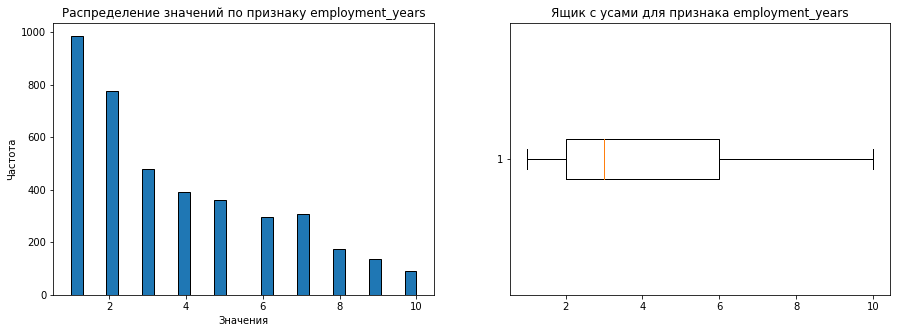

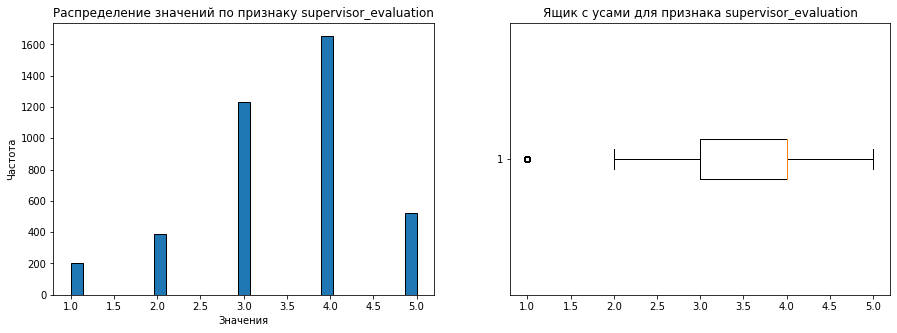

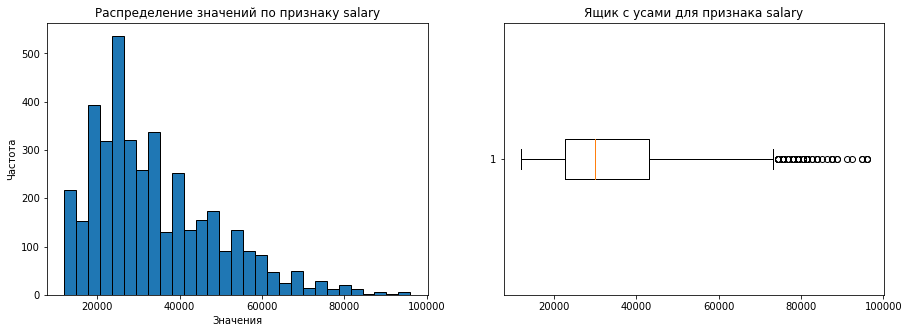

In [35]:
for_num1 = train_quit[train_quit.select_dtypes(include='number').columns].drop(['id'], axis=1)
for x in for_num1:
    num_plots(train_quit[x],x)
    plt.show()

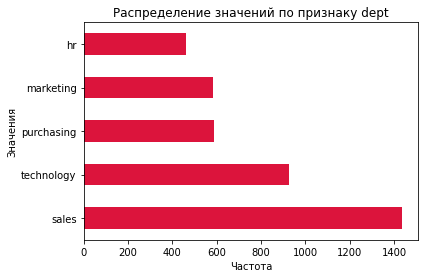

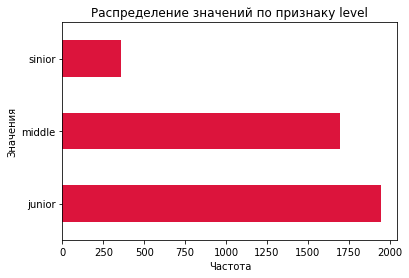

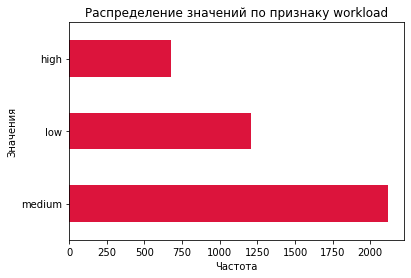

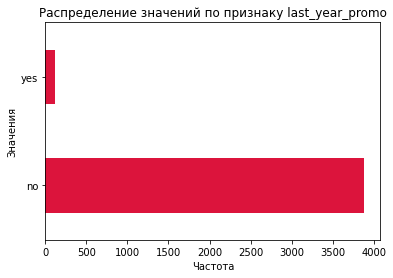

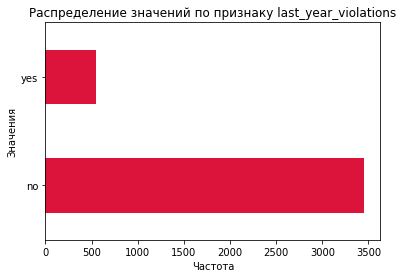

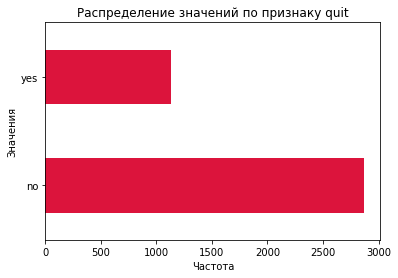

In [36]:
for_cat1 = train_quit[train_quit.select_dtypes(exclude='number').columns]
for x in for_cat1:
    cat_plots(train_quit[x],x)

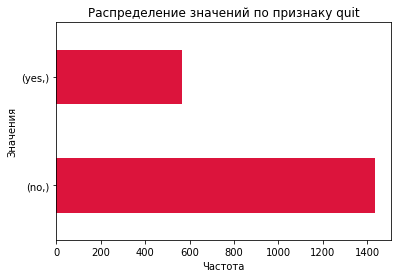

In [37]:
cat_plots(test_quit.drop('id',axis=1),'quit')

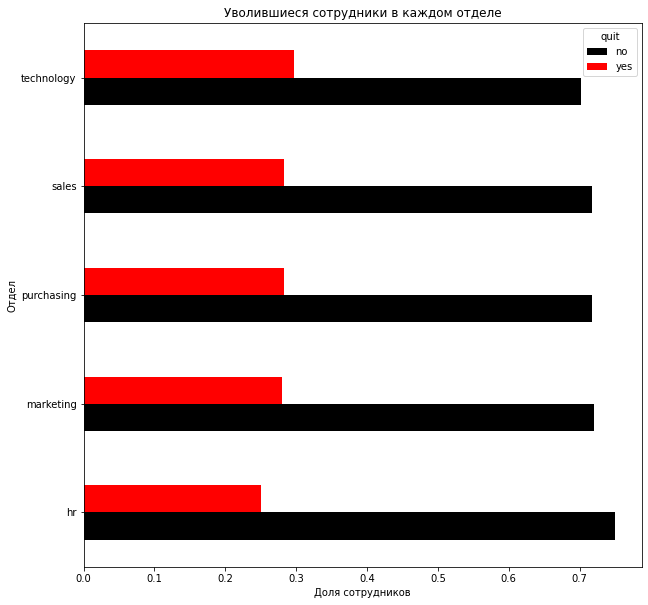

In [38]:
dept_quit=train_quit.groupby(['dept'])['quit'].value_counts(normalize=True)
dept_quit.unstack().plot(kind='barh', figsize=(10,10), color=['black', 'red'])
plt.title('Уволившиеся сотрудники в каждом отделе')
plt.xlabel('Доля сотрудников')
plt.ylabel('Отдел');

Больше всего увольняется из отдела продаж (35% от работавших), меньше всего из HR(25% от работавших)

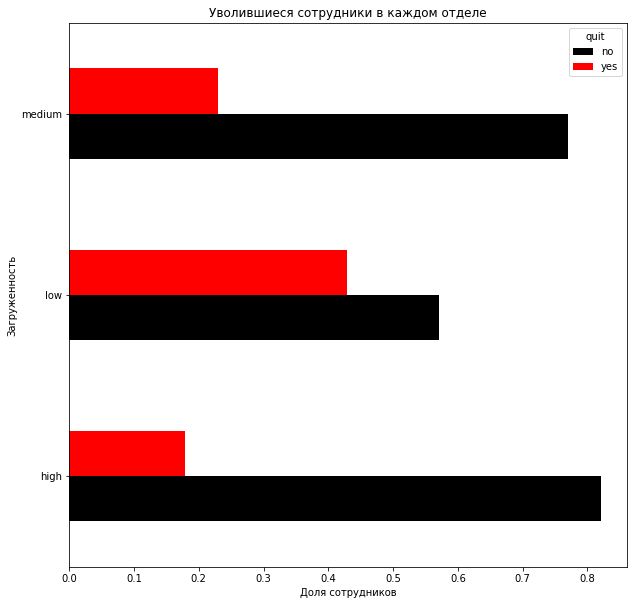

In [39]:
workload_quit = train_quit.groupby(['workload'])['quit'].value_counts(normalize=True)
workload_quit.unstack().plot(kind='barh', figsize=(10,10), color=['black', 'red'])
plt.title('Уволившиеся сотрудники в каждом отделе')
plt.xlabel('Доля сотрудников')
plt.ylabel('Загруженность');

Чаще всего увольняются сотрудники со средней и слабой нагрузкой, а в процентном соотношении, больше всего увольянется работников со слабой загрузкой. Вероятно, это обусловлено тем, что большая нагрузка и сеньеров, а они получают большую зп, поэтому редко увольняются

In [40]:
final = test_quit.merge(test_target_job_satisfaction_rate, on='id',how='left') #объединяем таблицы с целевым и тестовой выборкой

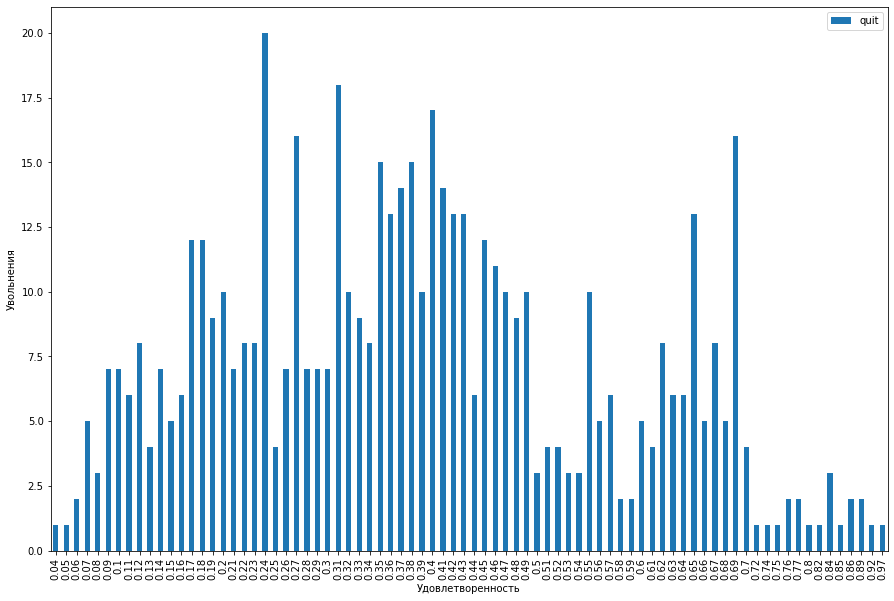

In [41]:
satisfaction_quit = final[['job_satisfaction_rate','quit']].query('quit=="yes"')
quit_yes = satisfaction_quit.pivot_table(index='job_satisfaction_rate', values='quit', aggfunc='count')
quit_yes.plot(kind='bar',figsize=(15,10),xlabel='Удовлетворенность',ylabel='Увольнения');

Как видим люди, которые удовлетворены работой на 75%+ практически не увольняются, в то время как работники с удовлетворенностью 27%-50% увольняются очень часто, также часто уходят работники с удовлетворенность от 62% до 69%

Можно сказать, что если челвовек удовлетворен своей работой выше 70%, то вероятность его увольнения достаточно мала. Больше количество увольнений с удовлетворенность в 69% может быть обсуловлено тем, что этим работникам предложили более высокий оклад

In [42]:
print('Средняя зарплата уволившихся сотрудников:',train_quit['salary'][train_quit['quit'] == 'yes'].mean())
print('Средняя зарплата работающих сотрудников:',train_quit['salary'][train_quit['quit'] == 'no'].mean())

Средняя зарплата уволившихся сотрудников: 23885.106382978724
Средняя зарплата работающих сотрудников: 37702.22841225627


Как видим, скорее всего мое суждение верно, тк зарплата неуволившихся сотрудников выше

# Вывод

По результатам исследовательского анализа можно сказать,что:

- dept: большинство работников находится в отделе продаж, меньше всего в отделе HR
- level: меньше всего в компании работает сеньеров, примерно поровну работников ранга джун и мидл
- workload: достаточно мало работников имеют сильную загруженность, большинство сотрудников загружены средне
- last_year_promo: за последний год практически не было повышений
- last_year_violations: порядка 12% сотрудников нарушали условие трудового договора, остальные сотрудники не нарушали
- employment_years: Мультимодальное распределение, большинство работников устроились в компанию недавно, чем больше опыт работы в компании, тем меньше таких работников(с большим опытом)
- supervisor_evaluation: Мультимодальное распределение, почти все работники получили оценку 4 на втором месте по популярности оценка 3, самая редкая оценка - 1
- salary: Нормальное распределение со смещением влево, в основном работники получают от 20 до 30 тысяч, также в данных есть достаточно большие значения, но я бы не сказал, что эти данные могут навредить модели, а также не думаю, что их стоит удалять, тк сеньеры получают высокие зп и наличие в данных таких значений, поможет правильно классифицировать удовлетвроенность работника уровня сеньер
- целевой признак job_satisfaction_rate:Нормальное распределение со смещением вправо, в среднем работники удовлетворены на 70%, также большое количество работников удовлетворены на 80%

Все признаки изучили, по поводу выбросов описано в пункте salary, исправлять данные не нужно

Чаще всего увольняюся сотрудники из отдела продаж со среденей или слабой нагрузкой

## Добавление нового признака

In [43]:
test_features['job_satisfaction_rate'] = randomized_search.predict(X_test)
test_features

/opt/conda/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
0,485046,marketing,junior,medium,2,no,no,5,28800,0.863333
1,686555,hr,junior,medium,1,no,no,4,30000,0.670417
2,467458,sales,middle,low,5,no,no,4,19200,0.654000
3,418655,sales,middle,low,6,no,no,4,19200,0.655000
4,789145,hr,middle,medium,5,no,no,5,40800,0.824643
...,...,...,...,...,...,...,...,...,...,...
1995,393147,marketing,junior,low,3,no,no,3,20400,0.494000
1996,109582,technology,middle,low,3,no,no,2,21600,0.170000
1997,305653,technology,junior,low,1,no,no,3,14400,0.240000
1998,160233,technology,middle,low,8,no,no,1,32400,0.550000


In [44]:
train_quit['job_satisfaction_rate'] = randomized_search.predict(train_quit)
train_quit

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit,job_satisfaction_rate
0,723290,sales,middle,high,2,no,no,4,54000,no,0.660000
1,814010,sales,junior,medium,2,no,no,4,27600,no,0.853529
2,155091,purchasing,middle,medium,5,no,no,1,37200,no,0.364091
3,257132,sales,junior,medium,2,no,yes,3,24000,yes,0.380000
4,910140,marketing,junior,medium,2,no,no,5,25200,no,0.690000
...,...,...,...,...,...,...,...,...,...,...,...
3995,588809,sales,junior,medium,4,no,no,3,26400,no,0.528571
3996,672059,sales,middle,high,9,no,no,4,52800,no,0.848889
3997,536432,purchasing,junior,low,2,no,yes,4,12000,yes,0.560000
3998,692133,purchasing,middle,medium,2,no,no,4,33600,no,0.553333


## Подготовка данных

In [45]:
new_df = test_features.merge(test_quit, on='id', how='left') #объеденим оба теста в 1 таблицу

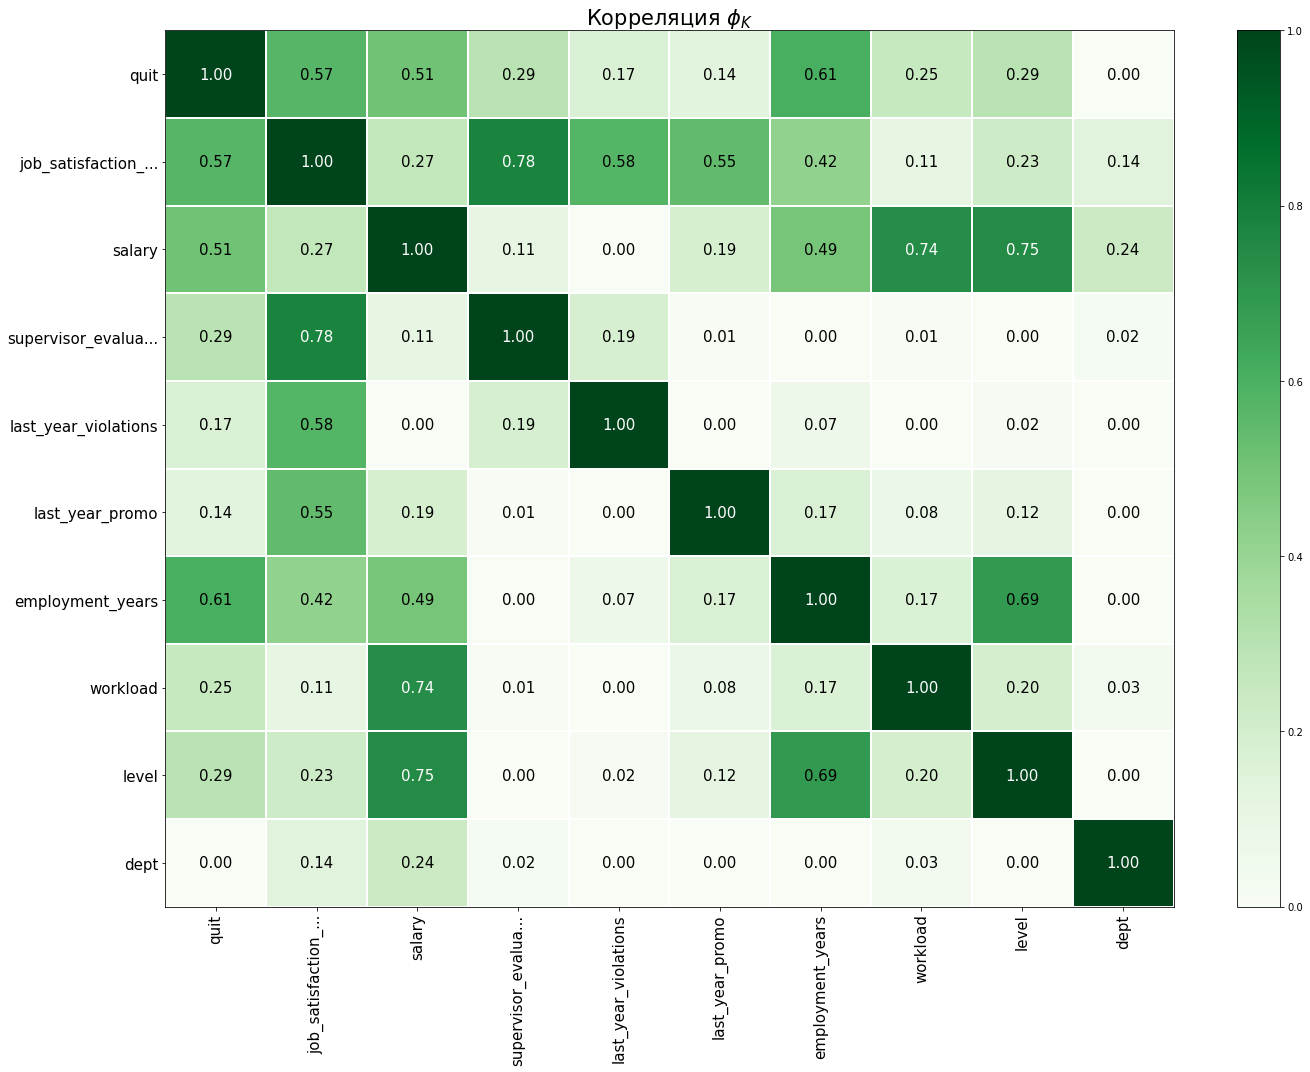

In [46]:
phik_overview=new_df.drop('id', axis=1).phik_matrix(verbose=False)

plot_correlation_matrix(
    phik_overview.values,
    x_labels=phik_overview.columns,
    y_labels=phik_overview.index,
    vmin=0, vmax=1, color_map='Greens',
    title=r'Корреляция $\phi_K$',
    fontsize_factor=1.5,
    figsize=(20, 15)
)

In [47]:
train_quit1=train_quit.drop('id',axis=1)
print(train_quit1.duplicated().sum())
train_quit1.drop_duplicates(inplace=True)#после удаления id появляются дубликаты

1413


In [48]:
X1_train = train_quit1.drop('quit', axis=1)
y1_train = train_quit1['quit'] 
X1_test = new_df.drop(['quit','id'], axis=1)
y1_test = new_df['quit'] 

In [49]:
le = LabelEncoder()
y1_train=le.fit_transform(y1_train) 
le.classes_
y1_test=le.transform(y1_test)

## Обучение моделей

In [50]:
ohe_columns = ['dept', 'last_year_promo', 'last_year_violations']
ord_columns = ['level', 'workload']
num_columns = ['employment_years', 'supervisor_evaluation', 'salary', 'job_satisfaction_rate']
 
    
ohe_pipe = Pipeline(
    [('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False))
    ]
)

ord_pipe = Pipeline(
    [('simpleImputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ord',  OrdinalEncoder(
                categories=[
                    ['junior', 'middle', 'sinior'], 
                    ['low', 'medium', 'high']
                ], 
                handle_unknown='use_encoded_value', unknown_value=np.nan
            )
        ),
     ('simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
     
    ]
)

data_preprocessor = ColumnTransformer(
    [('ohe', ohe_pipe, ohe_columns),
     ('ord', ord_pipe, ord_columns),
     ('num', StandardScaler(), num_columns)
    ], 
    remainder='passthrough'
)

pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', DecisionTreeClassifier())
])
 
param_grid = [

    {
        'models': [LogisticRegression()],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']   
    },

    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(2, 15),
        'models__max_features': range(2, 15),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(2, 30),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']   
    }
]

randomized_search = RandomizedSearchCV(
    pipe_final,
    param_grid,
    n_jobs=-1,
    cv=10,
    random_state=RANDOM_STATE,
    n_iter=10,
    scoring='roc_auc'
)
randomized_search.fit(X1_train, y1_train)

RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('ohe',
                                                                               Pipeline(steps=[('simpleImputer_ohe',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('ohe',
                                                                                                OneHotEncoder(drop='first',
                                                                                                              handle_unknown='ignore',
                                                                                                              sparse_output=False))]),
                                                                               ['dept',
                                                                                'last_year_promo',
                                                                                'last_year_violations']),
                                                                              ('ord',
                                                                               Pi...
                                        {'models': [DecisionTreeClassifier(random_state=42)],
                                         'models__max_depth': range(2, 15),
                                         'models__max_features': range(2, 15),
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               'passthrough']},
                                        {'models': [KNeighborsClassifier()],
                                         'models__n_neighbors': range(2, 30),
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               'passthrough']}],
                   random_state=42, scoring='roc_auc')

In [51]:
print('Лучшая модель и её параметры:\n\n', randomized_search.best_estimator_)
print(f'Параметры лучшей модели:\n{randomized_search.best_params_}')
print ('Метрика лучшей модели:', randomized_search.best_score_)

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['dept', 'last_year_promo',
                                                   'last_year_violations']),
                                                 ('ord',
                            

In [52]:
results = pd.DataFrame(randomized_search.cv_results_)
display(results[
    ['rank_test_score', 'param_models', 'mean_test_score','params']
].sort_values('rank_test_score')) 

,rank_test_score,param_models,mean_test_score,params
2,1,DecisionTreeClassifier(random_state=42),0.889926,"{'preprocessor__num': StandardScaler(), 'model..."
9,2,DecisionTreeClassifier(random_state=42),0.889287,"{'preprocessor__num': MinMaxScaler(), 'models_..."
7,3,KNeighborsClassifier(),0.885030,"{'preprocessor__num': 'passthrough', 'models__..."
0,4,DecisionTreeClassifier(random_state=42),0.875619,"{'preprocessor__num': StandardScaler(), 'model..."
8,5,DecisionTreeClassifier(random_state=42),0.868925,"{'preprocessor__num': MinMaxScaler(), 'models_..."
3,6,DecisionTreeClassifier(random_state=42),0.867140,"{'preprocessor__num': StandardScaler(), 'model..."
5,7,DecisionTreeClassifier(random_state=42),0.862006,"{'preprocessor__num': MinMaxScaler(), 'models_..."
1,8,DecisionTreeClassifier(random_state=42),0.840475,"{'preprocessor__num': 'passthrough', 'models__..."
4,9,DecisionTreeClassifier(random_state=42),0.810344,"{'preprocessor__num': StandardScaler(), 'model..."
6,10,DecisionTreeClassifier(random_state=42),0.787807,"{'preprocessor__num': 'passthrough', 'models__..."


In [53]:
print(f'Метрика ROC_AUC на тестовой выборке: {round(roc_auc_score(y1_test, randomized_search.predict_proba(X1_test)[:,1]),2)}')

Метрика ROC_AUC на тестовой выборке: 0.92


/opt/conda/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


## Вывод
Лучше всего справилась модель DecisionTreeClassifier с параметрами: StandardScaler(), 'models__max_features': 8, 'models__max_depth': 6

Метрика на тестовой выборке равняется 0.92

## Общий вывод

Нам необходимо было разработать 2 модели: для определения удовлетворенности работников и предсказание,что сотрудник уволится из компании

*Для поиска моделей для определения удовлетворенности работников:*

Мы предобработали данные, ошибок в них не обнаружено

Провели исследовательский анализ и выявили, что в принаках:

- dept: большинство работников находится в отделе продаж, меньше всего в отделе HR

- level: меньше всего в компании работает сеньеров, примерно поровну работников ранга джун и мидл

- workload: достаточно мало работников имеют сильную загруженность, большинство сотрудников загружены средне

- last_year_promo: за последний год практически не было повышений

- last_year_violations: порядка 12% сотрудников нарушали условие трудового договора, остальные сотрудники не нарушали

- employment_years: Мультимодальное распределение, большинство работников устроились в компанию недавно, чем больше опыт работы в компании, тем меньше таких работников(с большим опытом)

- supervisor_evaluation: Мультимодальное распределение, почти все работники получили оценку 4 на втором месте по популярности оценка 3, самая редкая оценка - 1

- salary: Нормальное распределение со смещением влево, в основном работники получают от 20 до 30 тысяч, также в данных есть достаточно большие значения, но я бы не сказал, что эти данные могут навредить модели, а также не думаю, что их стоит удалять, тк сеньеры получают высокие зп и наличие в данных таких значений, поможет правильно классифицировать удовлетвроенность работника уровня сеньер

- целевой признак job_satisfaction_rate:Нормальное распределение со смещением вправо, в среднем работники удовлетворены на 70%, также большое количество работников удовлетворены на 80%

Мы обучили 2 модели: LinearRegression и DecisionTreeRegressor. Наилучшей оказалась модель DecisionTreeRegressor с параметрами StandardScaler(), 'models__max_features': 14, 'models__max_depth': 13 

Поиск моделей проводился при помощи пайплайнов

Модель считалась удачной, если метрика SMAPE была меньше 15, в нашем случае метрика равнялась 14.38.

*Для поиска лучшей модели, которая сможет предсказать на основе данных заказчика, что сотрудник уволится из компании предприняты шаги:*

Провели предобработку, выявили, что в данных нет ошибок

Провели исследовтельский анализ, распределние признаков осталось неизменным по сравнению с 1 моедлью

Мы обучили 3 модели: DecisionTreeClassifier, LogisticRegression и KNeighborsClassifier. Наилучшей оказалась:  DecisionTreeClassifier с параметрами: StandardScaler(), 'models__max_features': 8, 'models__max_depth': 6

Ее метрика roc_auc на тестовой выборке равняется 0.92 

Бизнесу можно посоветовать постаратсья поднять зарплаты как новым специалистам, так и уже работающим. В основном более высокая зарплата является главным стимулом к смене места работы. Также стоит давать больше повышений для своих работников, тк это тоже удверживает сотрудников в компании.